# Figure 6 part 1 - Upscaled CROP-seq KO150 screen across time analyses

In [1]:
# set correct working directory -> project folder
getwd()
setwd('../..')
getwd()

[1] "/home/ptraxler/projects/bmdm-stim/workflow/notebooks"

[1] "/home/ptraxler/projects/bmdm-stim"

In [2]:
# source the figure theme, libraries and utility functions
source("./src/figure_theme.R")

In [3]:
library(Seurat, quietly=TRUE)
library(reshape2)

Attaching SeuratObject

Attaching sp


Attaching package: ‘Seurat’


The following object is masked from ‘package:Hmisc’:

    Key




# configs

In [4]:
# configs
data_path <- file.path('results','KO150')
results_path <- file.path('results','figures','figure_6')

In [5]:
# make directories if not exist
dir.create(results_path, showWarnings = FALSE, recursive = TRUE)

# load & prepare data

In [6]:
# loading Seurat object
KO150 <-readRDS(file = file.path(data_path,paste0("KO150_normalized_Seurat.rds")))
KO150

An object of class Seurat 
48804 features across 28303 samples within 5 assays 
Active assay: SCT (17131 features, 3000 variable features)
 4 other assays present: RNA, AB, gRNA, HTO
 2 dimensional reductions calculated: pca, umap

In [7]:
# load mixscape object
KO150_mixscape_all <- readRDS(file = file.path(data_path,'mixscape','all',"KO150_mixscape_subset_Seurat.rds"))
KO150_mixscape_all

An object of class Seurat 
34408 features across 6198 samples within 5 assays 
Active assay: PRTB (2735 features, 0 variable features)
 4 other assays present: RNA, AB, gRNA, HTO
 6 dimensional reductions calculated: pca, umap, prtbpca, prtbumap, lda, ldaumap

In [8]:
# prepare metadata
KO150[['condition']] <- str_split_fixed(KO150$hto_demux, "_", 2)[,2]
KO150$KO_call[KO150$KO_call=='NonTargeting-'] <- 'NonTargeting'

KO150_mixscape_all[['condition']] <- str_split_fixed(KO150_mixscape_all$hto_demux, "_", 2)[,2]
KO150_mixscape_all$KO_call[KO150_mixscape_all$KO_call=='NonTargeting-'] <- 'NonTargeting'

In [9]:
unique(KO150$condition)
unique(KO150_mixscape_all$condition)

[1] "untreated" "LO28-6h"   "LO28-24h"

[1] "untreated" "LO28-6h"   "LO28-24h"

In [10]:
# colors for cond
cond_col <- setNames(object = hue_pal()(length(unique(KO150$condition))),nm = c('LO28-24h', 'LO28-6h', 'untreated'))
cond_col

LO28-24h   LO28-6h untreated 
"#F8766D" "#00BA38" "#619CFF"

In [11]:
cond_shapes

untreated   LO28-6h  LO28-24h 
       19        17        15

In [12]:
# loading KO15 Seurat object for KO calls
KO15 <-readRDS(file = file.path('results','KO15',paste0("KO15_normalized_Seurat.rds")))
KO15

An object of class Seurat 
45322 features across 9153 samples within 5 assays 
Active assay: SCT (14187 features, 3000 variable features)
 4 other assays present: RNA, AB, gRNA, HTO
 2 dimensional reductions calculated: pca, umap

In [13]:
# colors for all perturbations
# KO_col_KO15 <- setNames(object = hue_pal()(length(unique(KO15$KO_call))),nm = unique(KO15$KO_call))
# KO_col_KO15["mNon-targeting"] <- "#D3D3D3"
KO_col_KO15 <- KO_col
names(KO_col_KO15) <- sub('.', '', names(KO_col_KO15))
names(KO_col_KO15) <- sub('Non-targeting', 'NonTargeting', names(KO_col_KO15))
names(KO_col_KO15)[names(KO_col_KO15) == 'cJun'] <- 'Jun'
# KO_col_KO15

In [14]:
# extend colors to all KO150 perturbations
KO_col <- hue_pal()(length(unique(KO150$KO_call))+4)
KO_col <- KO_col[1:length(unique(KO150$KO_call))]
names(KO_col) <- unique(KO150$KO_call)
# KO_col

In [15]:
# change colors for consistency with KO15 
KO_col_names <- names(KO_col[names(KO_col) %in% names(KO_col_KO15)])

for (col in KO_col[KO_col %in% KO_col_KO15]){
    KO_col[KO_col==col] <- KO_col[names(KO_col_KO15[KO_col_KO15==col])]
}

KO_col[KO_col_names] <- KO_col_KO15[KO_col_names]

In [16]:
# save KO colors for later use
saveRDS(KO_col, file = file.path(results_path,"KO_colors.rds"))

# Mixscape LDA UMAP all

In [27]:
KO_col_mixscape <- KO_col
# names(KO_col_mixscape) <- paste(names(KO_col_mixscape), 'KO')
names(KO_col_mixscape) <- sub('NonTargeting', 'NT', names(KO_col_mixscape))
# KO_col_mixscape

In [28]:
# KO_col_mixscape

In [29]:
KO150_mixscape_all$mixscape_class_new <- as.factor(sub(' KO', '', KO150_mixscape_all$mixscape_class))
Idents(KO150_mixscape_all) <- "mixscape_class_new"

In [30]:
width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

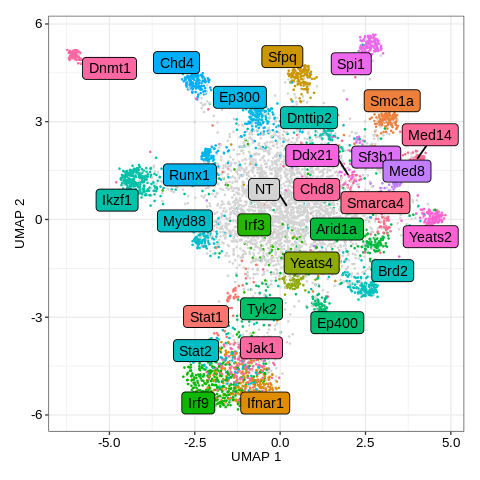

In [31]:
# plot LDA UMAP
KO150_mixscape_plot <- DimPlot(object = KO150_mixscape_all,
                                        reduction = "ldaumap",
                                        repel = T,
                                        label.size = 3,
                                        label = T,
                                        cols = KO_col_mixscape,#col,
                                        pt.size=0.1,
                                        label.box=T) +
# scale_color_manual(values=KO_col_mixscape, drop=FALSE) +
ylab("UMAP 2") +
xlab("UMAP 1") +
macro_theme() + 
NoLegend()


KO150_mixscape_plot 

In [32]:
# save plot
ggsave_new(filename="mixscape_LDA_UMAP_all",
           results_path=results_path,
           plot=KO150_mixscape_plot,
           width=width,
           height=height
          )

# Cross-prediction Graph of Mixscape all PRTB
- set different order and dedicated symbols in legend for condition (did not manage)

In [18]:
# configs
cond <- 'all'
clf_label <- 'LR'
conn_label <- 'prob'
directed <- TRUE

In [19]:
# Load adjacency matrix
conn <- read.csv(file=file.path(data_path,'KO_classifier', cond, paste0("KO150_clf",clf_label,"_conn",conn_label,"Norm.csv")), row.names=1)
colnames(conn)<-gsub('.KO','',colnames(conn))
rownames(conn)<-gsub(' KO','',rownames(conn))
dim(conn)
# conn

[1] 58 58

In [19]:
# Load mixscape class information & filter annotations
annot_mixscape <- read.csv(file=file.path(data_path,'mixscape',cond, "KO150_mixscape_annotations.csv"), row.names=1)
annot_mixscape <- annot_mixscape[annot_mixscape$mixscape_class.global=='KO',]
annot_mixscape$mixscape_class <- gsub(' KO','', annot_mixscape$mixscape_class)
dim(annot_mixscape)
head(annot_mixscape)

[1] 3202    3

,mixscape_class,mixscape_class_p_ko,mixscape_class.global
,<chr>,<dbl>,<chr>
A1_AAACCTGCATGCTGGC-1,Smc1a,0.9950230,KO
A1_AAACGGGAGAAACGCC-1,Ifnar1,0.9960430,KO
A1_AAACGGGCACCTCGGA-1,Sfpq,1.0000000,KO
A1_AAACGGGGTCCAAGTT-1,Tyk2,0.9552953,KO
A1_AAAGATGGTAGCCTAT-1,Irf9,0.7050441,KO
A1_AAAGCAACAGTTAACC-1,Ep300,0.7731249,KO


In [20]:
if(cond=='all'){
    class_sizes <- rep(c(50),times=length(colnames(conn))) 
}else{
    class_sizes <- as.numeric((table(annot_mixscape$mixscape_class)[colnames(conn)]))
}

In [21]:
# load previous best layout coordinates
coordinates <- as.matrix(read.csv(file.path("results/KO150/KO_classifier/all",'layoutCoordinates.csv'), row.names=1))
dim(coordinates)
head(coordinates)

[1] 58  2

,x,y
1,-18.594886,-7.40611186
2,13.298746,-8.29411803
3,-20.661390,2.77251550
4,4.746256,-12.19563779
5,-23.941226,2.97611110
6,-20.494215,0.01477233


In [32]:
# make cross prediction graph plot

# set colors & shapes
node_KO <- gsub('^(.*)\\+','',rownames(conn))
node_cond <- gsub('\\+.*','',rownames(conn))
node_colors <- KO_col[node_KO]
node_shape <- cond_shapes[node_cond]
border_color <- cond_col[node_cond]
stroke_size <- 1.5
point_size <- 5

cut_off <- 0.1

# data
adjacencyMatrix <- as.matrix(conn)
# parameters
# cut_off <- 0.1
curved=FALSE

adjacencyMatrix[adjacencyMatrix<cut_off] <- 0

# plot graph

# Empty ggplot2 theme
new_theme_empty <- theme_bw()
new_theme_empty$line <- element_blank()
new_theme_empty$rect <- element_blank()
new_theme_empty$strip.text <- element_blank()
new_theme_empty$axis.text <- element_blank()
new_theme_empty$plot.title <- element_blank()
new_theme_empty$axis.title <- element_blank()
new_theme_empty$plot.margin <- structure(c(0, 0, 0, 0), unit = "lines",
                                         valid.unit = 3L, class = "unit")

if (exists("coordinates")){
    layoutCoordinates <- coordinates
} else{
    layoutCoordinates <- gplot(adjacencyMatrix, mode = "fruchtermanreingold")  # Get graph layout coordinates
}



adjacencyList <- melt(adjacencyMatrix)  # Convert to list of ties only
adjacencyList <- adjacencyList[adjacencyList$value > cut_off, ] # prune weak edges

# Function to generate paths between each connected node
edgeMaker <- function(whichRow, len = 100, curved = TRUE){
    fromC <- layoutCoordinates[adjacencyList[whichRow, 1], ]  # Origin
    toC <- layoutCoordinates[adjacencyList[whichRow, 2], ]  # Terminus

    # Add curve:
    graphCenter <- colMeans(layoutCoordinates)  # Center of the overall graph
    bezierMid <- c(fromC[1], toC[2])  # A midpoint, for bended edges
    distance1 <- sum((graphCenter - bezierMid)^2)
    if(distance1 < sum((graphCenter - c(toC[1], fromC[2]))^2)){
    bezierMid <- c(toC[1], fromC[2])
    }  # To select the best Bezier midpoint
    bezierMid <- (fromC + toC + bezierMid) / 3  # Moderate the Bezier midpoint
    if(curved == FALSE){bezierMid <- (fromC + toC) / 2}  # Remove the curve

    edge <- data.frame(bezier(c(fromC[1], bezierMid[1], toC[1]),  # Generate
                            c(fromC[2], bezierMid[2], toC[2]),  # X & y
                            evaluation = len))  # Bezier path coordinates
    edge$Sequence <- 1:len  # For size and colour weighting in plot
    edge$Group <- paste(adjacencyList[whichRow, 1:2], collapse = ">")

    # add a vector 'Probability' that linearly interpolates between the weights of the current edge and its counterpart
    x <- c(1,len)
    y <- c(adjacencyMatrix[adjacencyList[whichRow,'Var1'],adjacencyList[whichRow,'Var2']],adjacencyMatrix[adjacencyList[whichRow,'Var2'],adjacencyList[whichRow,'Var1']])
    edge$Probability <- approx(x,y,xout=1:len)$y

  return(edge)
}

# Generate a (curved) edge path for each pair of connected nodes
allEdges <- lapply(1:nrow(adjacencyList), edgeMaker, len = 500, curved = curved)
allEdges <- do.call(rbind, allEdges)  # a fine-grained path ^, with bend ^

zp1 <- ggplot(allEdges) 
zp1 <- zp1 + geom_path(aes(x = x, y = y, group = Group,  # Edges with gradient
                           colour = Sequence, size = Probability))  # and taper

zp1 <- zp1 + geom_point(data = data.frame(layoutCoordinates),  # Add nodes
#                         aes(x = x, y = y),  pch = 21, size = point_size, fill = node_colors, colour = border_color, stroke = stroke_size) # fill & borders are informative
                        aes(x = x, y = y, shape=names(node_shape)), size = point_size, color = node_colors)#+scale_shape_manual(name = "condition", labels = names(cond_shapes),values = cond_shapes) # fill and shape are informative

# zp1 <- zp1 + geom_text(data = data.frame(layoutCoordinates), aes(x = x, y = y, label=node_KO),#rownames(adjacencyMatrix)),
#                        hjust=0.5, vjust=-1)

zp1 <- zp1 + geom_label(data = data.frame(layoutCoordinates), aes(x = x, y = y, label=node_KO), fill=node_colors,#rownames(adjacencyMatrix)),
                       hjust=0.5, vjust=-0.5)

zp1 <- zp1 + scale_colour_gradient(low = gray(0), high = gray(0), guide = "none") # Customize gradient

zp1 <- zp1 + scale_size(range = c(1/10, point_size-1))#, guide = "none")  # Customize taper

crosspred_p <- zp1 + new_theme_empty + guides(shape = guide_legend('condition')) # Clean up plot

Warning message in melt(adjacencyMatrix):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(adjacencyMatrix). In the next version, this warning will become an error.”


In [33]:
width <- 8
height <- 7
options(repr.plot.width=width, repr.plot.height=height)

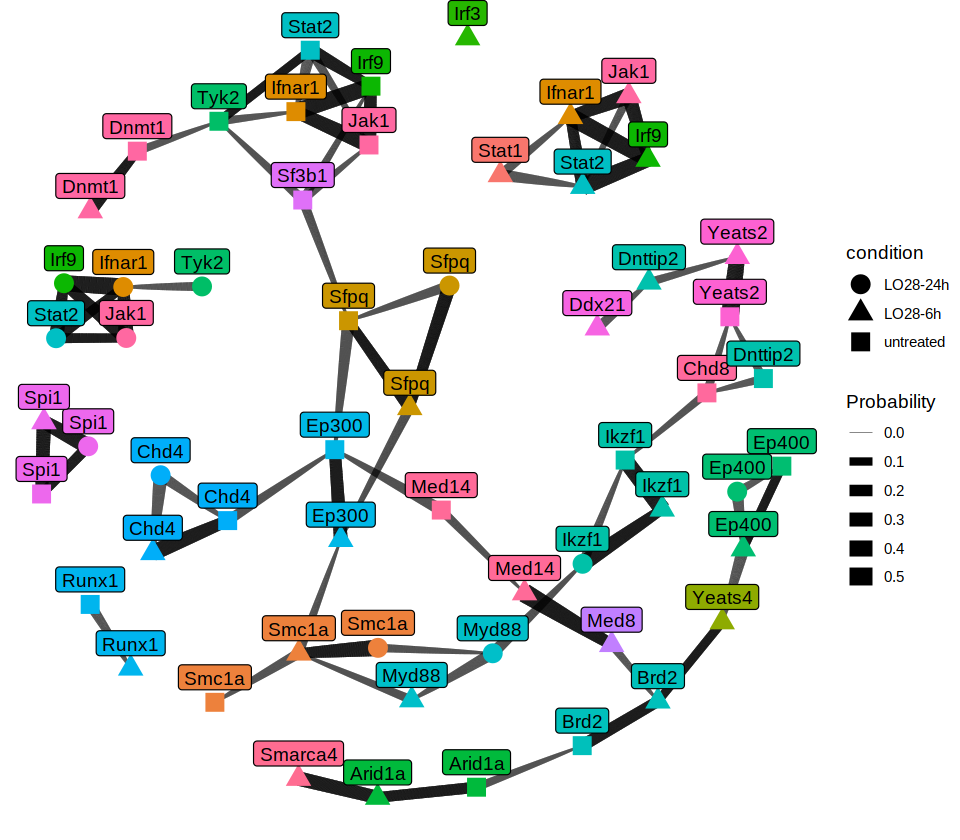

In [34]:
crosspred_p

In [25]:
# save plot
ggsave_new(filename="crossprediction_graph_all",
           results_path=results_path,
           plot=crosspred_p,
           width=width,
           height=height,
           dpi=600
          )

In [31]:
# # save layout coordinates
# write.csv(layoutCoordinates, file.path("results/KO150/KO_classifier/all",'layoutCoordinates.csv'))

# Highlighting Subsets of the Cross-prediction Graph

In [199]:
# configs
KO_combinations <- list("condition_dependent" = c("Ifnar","Irf9","Stat2","Jak1","Stat1","Tyk2"),
                       "novel_function" = c('Sfpq', 'Ep300'),
                       "condition_independent" = c('Spi1', 'Yeats2', 'Ikzf1')
                       )

width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

In [200]:
layoutCoordinates_annot <- data.frame(layoutCoordinates, row.names=rownames(conn))
layoutCoordinates_annot$KO <- gsub('^(.*)\\+','',rownames(layoutCoordinates_annot))
layoutCoordinates_annot$node_color <- "#000000"

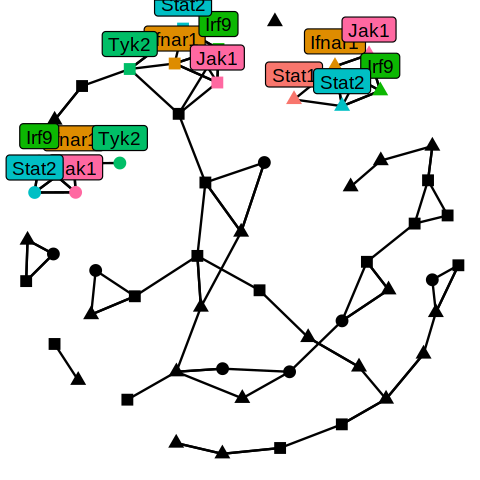

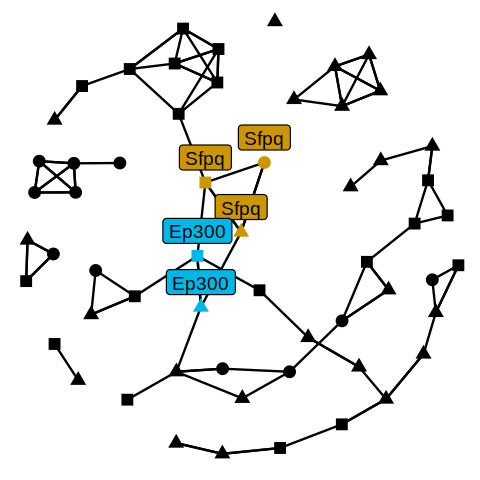

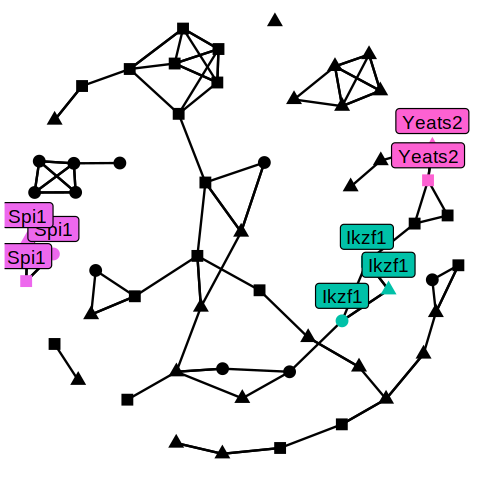

In [202]:
for(combo in names(KO_combinations)){
    KO_keep_color <- KO_combinations[[combo]]
    
    zp1 <- ggplot() 

    # edges
    zp1 <- zp1 + geom_path(data= allEdges, aes(x = x, y = y, group = Group), size=0.5)

    # add color to selected nodes
    layoutCoordinates_colored <- layoutCoordinates_annot
    layoutCoordinates_colored[grepl(paste(KO_keep_color, collapse="|"),rownames(layoutCoordinates_colored)),"node_color"] <- node_colors[layoutCoordinates_colored[grepl(paste(KO_keep_color, collapse="|"),rownames(layoutCoordinates_colored)),"KO"]]


    # nodes
    zp1 <- zp1 + geom_point(data = layoutCoordinates_colored,
                            aes(x = x, y = y, shape=names(node_shape)), size = 3, color = layoutCoordinates_colored$node_color)#+scale_shape_manual(name = "condition", labels = names(cond_shapes),values = cond_shapes) # fill and shape are informative

    # Add colored labels only for selected KOs
    selected_labels <- layoutCoordinates_colored[grepl(paste(KO_keep_color, collapse="|"),rownames(layoutCoordinates_colored)),]
    selected_node_colors <- node_colors[selected_labels$KO]
    # labels
    zp1 <- zp1 + geom_label(data = selected_labels, aes(x = x, y = y, label=KO), fill=selected_node_colors, hjust=0.5, vjust=-0.5)

    crosspred_p <- zp1 + new_theme_empty + guides(shape = 'none', color = 'none') # Clean up plot

    print(crosspred_p)
    
    # save plot
    ggsave_new(filename=paste0("crossprediction_graph_",combo),
               results_path=results_path,
               plot=crosspred_p,
               width=width,
               height=height,
               dpi=300
              )
}

# Plot quantification of the relationship between within KO and within condition 

In [21]:
# load data
spectrum <- read.csv(file.path(data_path,'KO_classifier', cond,paste0("KO150_clf",clf_label,"_graph",conn_label,"_scores.csv")), row.names=1)
dim(spectrum)
head(spectrum)

[1] 20  2

,KO_score,cond_score
,<dbl>,<dbl>
Arid1a,0.4150957,0.5388111
Brd2,0.4695088,0.5346155
Chd4,0.4536510,0.4464037
Dnmt1,0.4112235,0.5387529
Dnttip2,0.2148323,0.5665719
Ep300,0.5764069,0.5227884


In [22]:
# correlation
cor_p <- round(cor(spectrum$KO_score, spectrum$cond_score, method="pearson"), digits=2)
cor_s <- round(cor(spectrum$KO_score, spectrum$cond_score, method="spearman"), digits=2)

In [23]:
spectrum$color <- KO_col[rownames(spectrum)]

In [24]:
width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

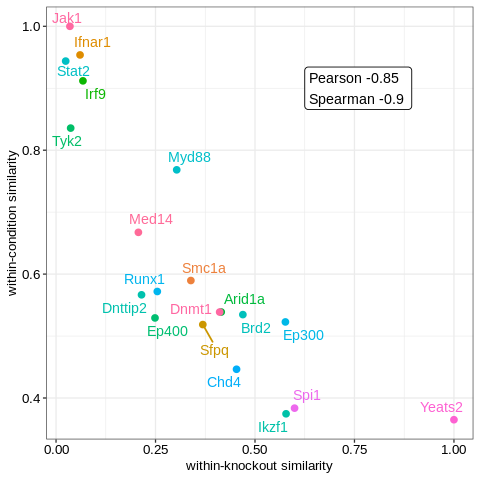

In [25]:
score_plot <- ggplot(data = spectrum, aes(x=KO_score, y=cond_score, label = rownames(spectrum))) + 
geom_point(color=spectrum$color) + 
geom_text_repel(color=spectrum$color, size = 3) +
xlab("within-knockout similarity") +    
ylab("within-condition similarity") +
annotate(x=0.625, y = 0.9, label=paste0("Pearson ",cor_p,"\nSpearman ",cor_s), geom="label", hjust=0, size=3, color = 'black') +
macro_theme()+
theme(legend.position="none")

score_plot

In [26]:
# save plot
ggsave_new(filename=paste0("KO150_clf",clf_label,"_graph",conn_label,"_scores"),
           results_path=results_path,
           plot=score_plot,
           width=width,
           height=height
          )